<a href="https://colab.research.google.com/github/AleksandrSosnin/Home_Work_A-B-test/blob/main/Home_Work_4_8_M4_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа»</b></h3>


## Импорт Библиотек

In [8]:
import numpy as np
import pandas as pd

import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Импорт данных

In [9]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, используя только визуализацию.

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалите их (drop_duplicates).
* Найти и удалить/отфильтровать выбросы по признаку `home_cost`. Таких точек около 5

In [10]:
# Определение численных признаков
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
print("Численные признаки:", numerical_features)

Численные признаки: ['was_married', 'children', 'salary', 'sex', 'age', 'home_cost', 'drive_info', 'happyness']


In [11]:
# Определение категориальных признаков
categorical_features = data.select_dtypes(exclude=[np.number]).columns.tolist()
print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['profession']


In [12]:
# Проверка признаков на нормальное распределение с использованием критерия Шапиро-Уилка
def check_normal_distribution(column):
    stat, p_value = stats.shapiro(data[column].dropna())
    return p_value > 0.05  # Если p_value > 0.05, распределение можно считать нормальным
normal_distributed_features = [col for col in numerical_features if check_normal_distribution(col)]
print("Признаки с нормальным распределением:", normal_distributed_features)

Признаки с нормальным распределением: []


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6000.
  res = hypotest_fun_out(*samples, **kwds)


In [13]:
# Определение бессмысленных признаков (например, признаков с низкой вариативностью или с большими пропусками)
meaningless_features = []

# Признаки с низкой вариативностью
low_variance_features = [col for col in numerical_features if data[col].var() < 0.01]
meaningless_features.extend(low_variance_features)

# Признаки с большим количеством пропусков
missing_data_features = [col for col in data.columns if data[col].isnull().mean() > 0.5]
meaningless_features.extend(missing_data_features)

print("Бессмысленные признаки:", meaningless_features)

Бессмысленные признаки: []


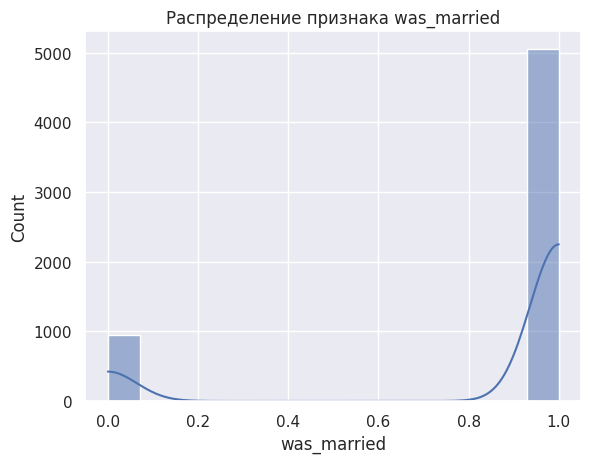

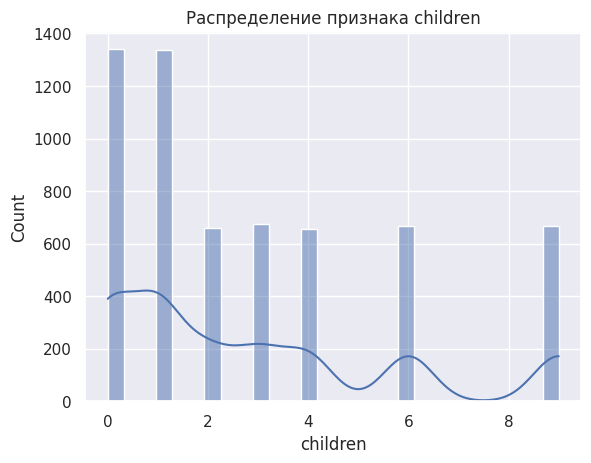

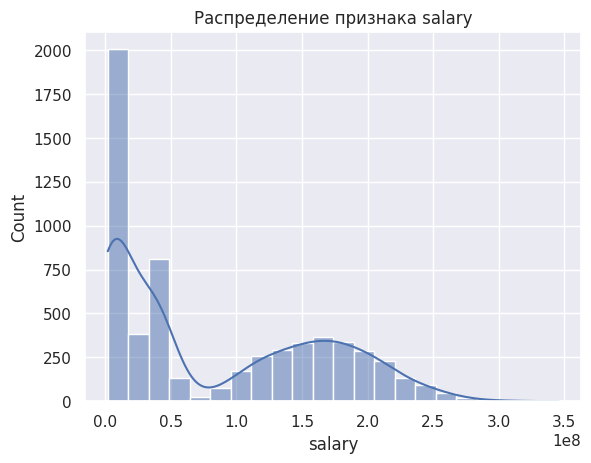

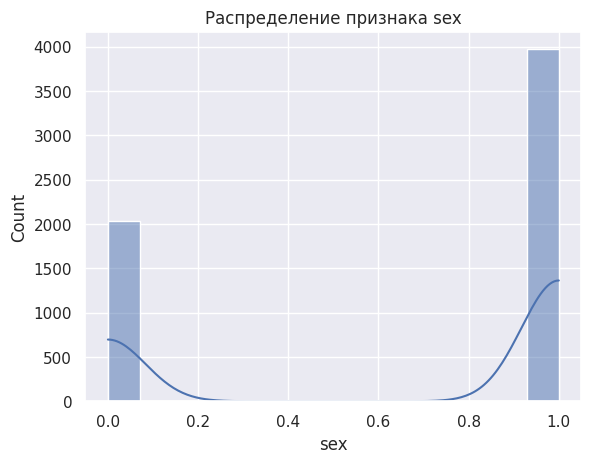

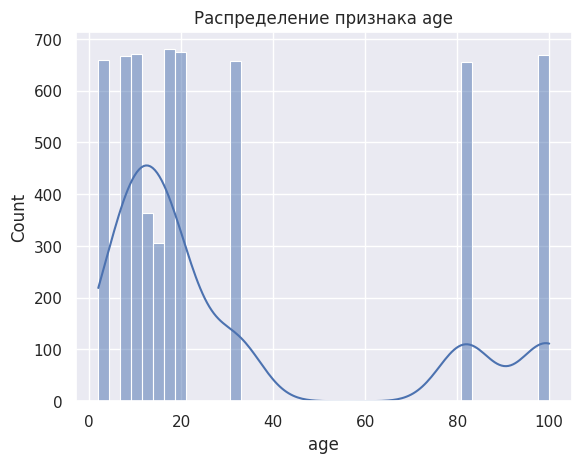

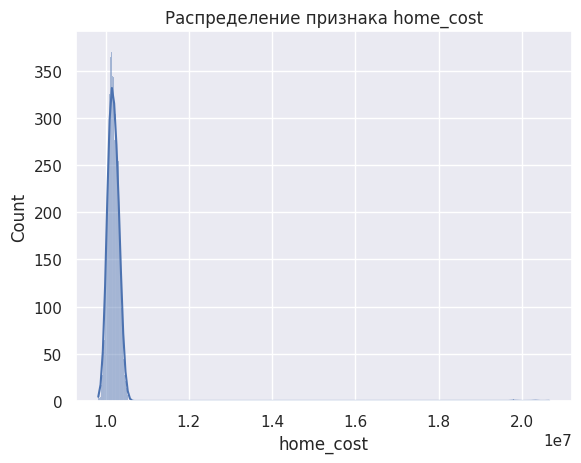

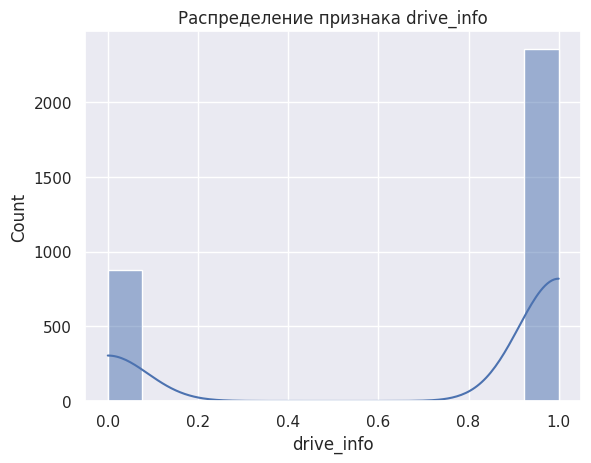

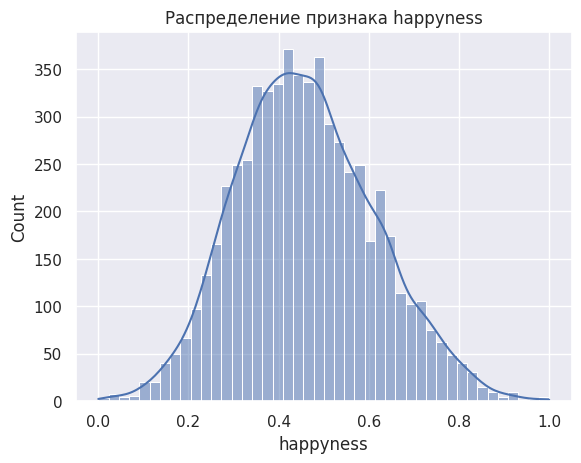

In [14]:
# Визуализация распределений для численных признаков
for col in numerical_features:
    sns.histplot(data[col], kde=True)
    plt.title(f'Распределение признака {col}')
    plt.show()

# Проверка гипотез

# Изучение датасета
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

<div class="alert alert-info">
    
Перед вами те же гипотезы, которые были в прошлом домашнем задании. Вы уже научились проверять эти утверждения визуально. Теперь же, помимо визуальной состовляющей вам еще нужно применить подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы на снове этих данных. В качестве уровня значимости принять 5%

* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

Средняя зарплата женщин: 57721198.99095336
Средняя зарплата мужчин: 98385888.45746912
T-статистика: -18.845682252233363
P-значение: 6.569385758787591e-76
Статистически значимое различие обнаружено: женщины имеют более высокую (или более низкую) зарплату, чем мужчины.


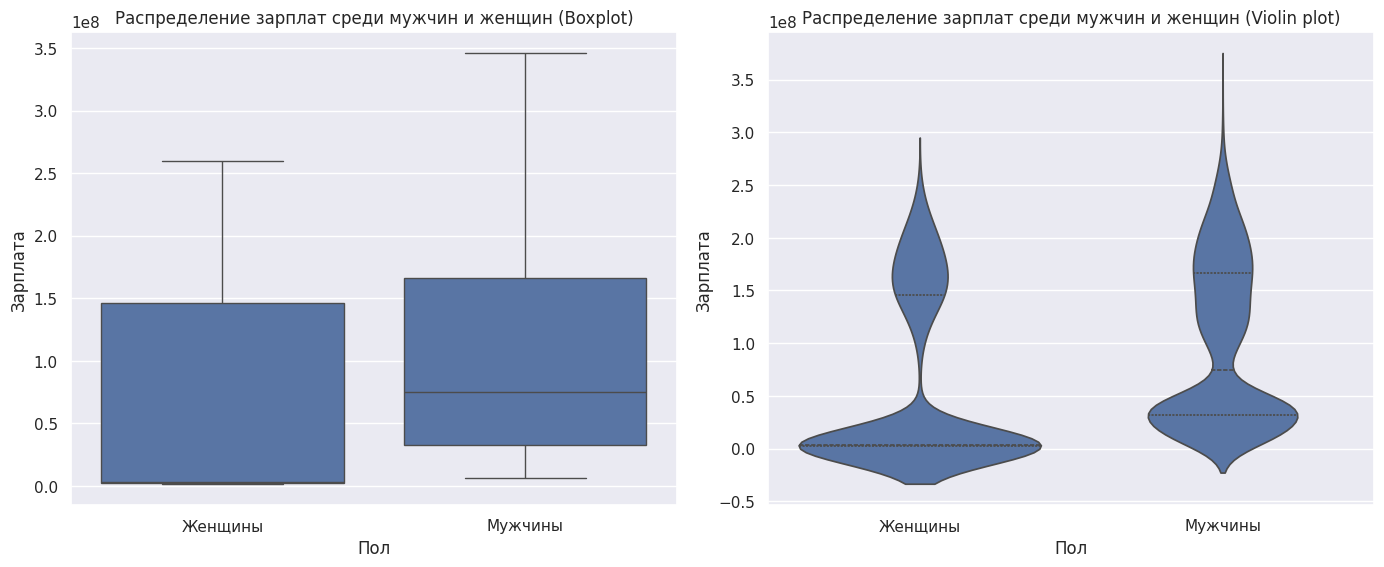

In [16]:
# Разделим данные на две группы по полу
salary_women = data[data['sex'] == 0]['salary']
salary_men = data[data['sex'] == 1]['salary']

# Рассчитаем средние зарплаты для мужчин и женщин
mean_salary_women = salary_women.mean()
mean_salary_men = salary_men.mean()

print(f"Средняя зарплата женщин: {mean_salary_women}")
print(f"Средняя зарплата мужчин: {mean_salary_men}")

# Проведем t-тест
t_stat, p_value = stats.ttest_ind(salary_women, salary_men, equal_var=False)

print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Проверим гипотезу
alpha = 0.05
if p_value < alpha:
    print("Статистически значимое различие обнаружено: женщины имеют более высокую (или более низкую) зарплату, чем мужчины.")
else:
    print("Статистически значимых различий в зарплате между женщинами и мужчинами не обнаружено.")

# Визуализация с использованием boxplot и violin plot
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='sex', y='salary', data=data)
plt.xticks([0, 1], ['Женщины', 'Мужчины'])
plt.title('Распределение зарплат среди мужчин и женщин (Boxplot)')
plt.xlabel('Пол')
plt.ylabel('Зарплата')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='sex', y='salary', data=data, inner='quartile')
plt.xticks([0, 1], ['Женщины', 'Мужчины'])
plt.title('Распределение зарплат среди мужчин и женщин (Violin plot)')
plt.xlabel('Пол')
plt.ylabel('Зарплата')

plt.tight_layout()
plt.show()


* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

Средняя зарплата инженеров: 42162119.349546
Средняя зарплата в сфере развлечений: 194005269.10805008
T-статистика: -101.14377502214174
P-значение: 0.0
Статистически значимое различие обнаружено: инженеры зарабатывают меньше, чем люди из сферы развлечений.


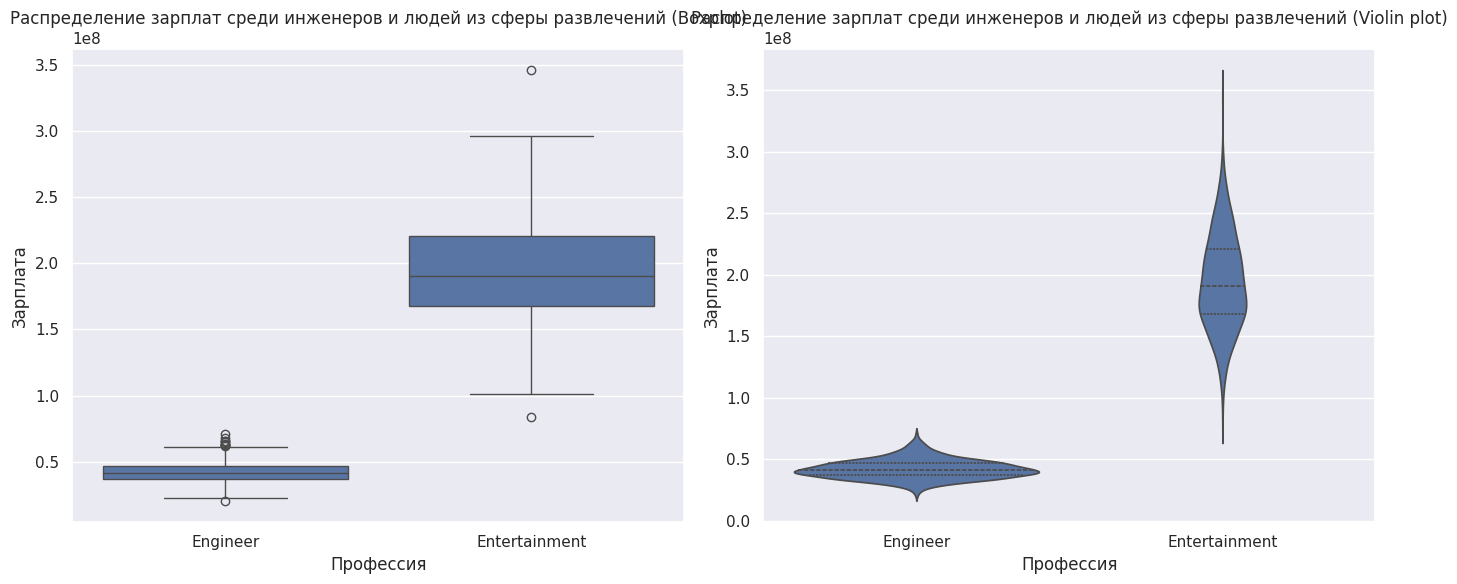

In [19]:

# Фильтруем данные для двух профессий
salary_engineers = data[data['profession'] == 'Engineer']['salary']
salary_entertainment = data[data['profession'] == 'Entertainment']['salary']

# Рассчитываем средние зарплаты для инженеров и людей из сферы развлечений
mean_salary_engineers = salary_engineers.mean()
mean_salary_entertainment = salary_entertainment.mean()

print(f"Средняя зарплата инженеров: {mean_salary_engineers}")
print(f"Средняя зарплата в сфере развлечений: {mean_salary_entertainment}")

# Проведем t-тест
t_stat, p_value = stats.ttest_ind(salary_engineers, salary_entertainment, equal_var=False)

print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Проверим гипотезу
alpha = 0.05
if p_value < alpha:
    print("Статистически значимое различие обнаружено: инженеры зарабатывают меньше, чем люди из сферы развлечений.")
else:
    print("Статистически значимых различий в зарплатах между инженерами и людьми из сферы развлечений не обнаружено.")

# Визуализация с использованием boxplot и violin plot
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='profession', y='salary', data=data[data['profession'].isin(['Engineer', 'Entertainment'])])
plt.title('Распределение зарплат среди инженеров и людей из сферы развлечений (Boxplot)')
plt.xlabel('Профессия')
plt.ylabel('Зарплата')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='profession', y='salary', data=data[data['profession'].isin(['Engineer', 'Entertainment'])], inner='quartile')
plt.title('Распределение зарплат среди инженеров и людей из сферы развлечений (Violin plot)')
plt.xlabel('Профессия')
plt.ylabel('Зарплата')

plt.tight_layout()
plt.show()


* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

Средняя зарплата у тех, у кого больше трех детей: 119206817.62367998
Средняя зарплата у тех, у кого три или меньше детей: 67451770.23724644
T-статистика: 26.249631194548922
P-значение: 8.719793999420786e-142
Статистически значимое различие обнаружено: люди с более чем тремя детьми зарабатывают меньше, чем те, у кого три или меньше детей.


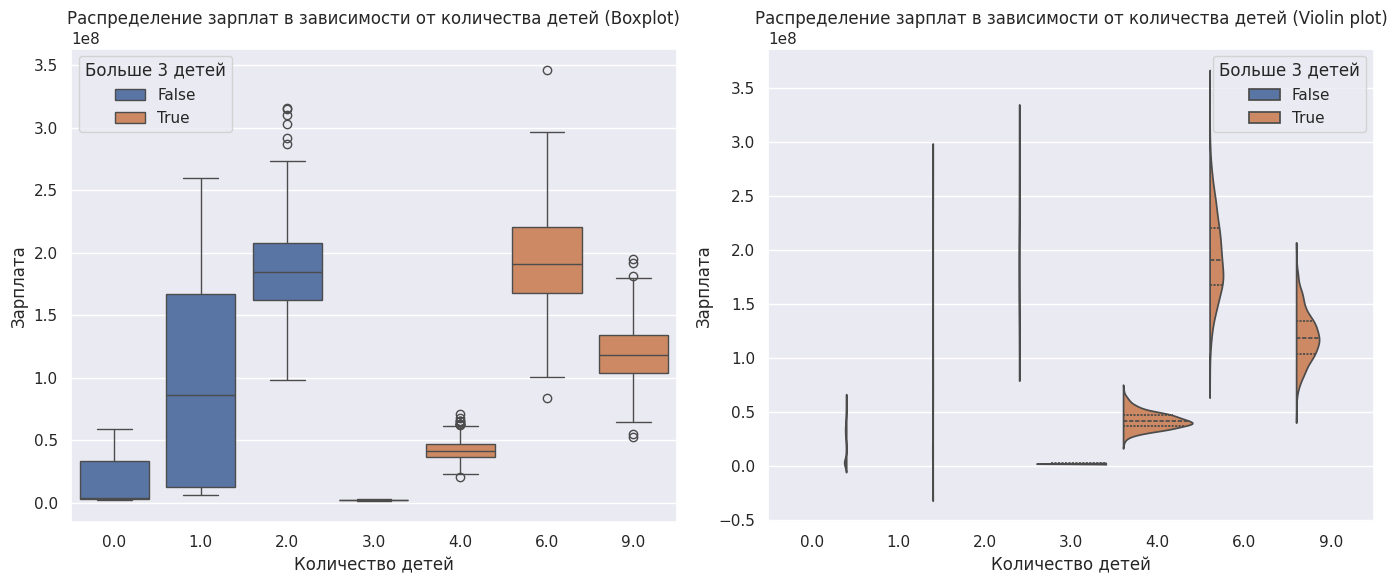

In [21]:

# Разделим данные на две группы
salary_more_than_three_kids = data[data['children'] > 3]['salary']
salary_three_or_less_kids = data[data['children'] <= 3]['salary']

# Рассчитаем средние зарплаты для обеих групп
mean_salary_more_than_three_kids = salary_more_than_three_kids.mean()
mean_salary_three_or_less_kids = salary_three_or_less_kids.mean()

print(f"Средняя зарплата у тех, у кого больше трех детей: {mean_salary_more_than_three_kids}")
print(f"Средняя зарплата у тех, у кого три или меньше детей: {mean_salary_three_or_less_kids}")

# Проведем t-тест
t_stat, p_value = stats.ttest_ind(salary_more_than_three_kids, salary_three_or_less_kids, equal_var=False)

print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Проверим гипотезу
alpha = 0.05
if p_value < alpha:
    print("Статистически значимое различие обнаружено: люди с более чем тремя детьми зарабатывают меньше, чем те, у кого три или меньше детей.")
else:
    print("Статистически значимых различий в зарплатах между этими группами не обнаружено.")

# Визуализация с использованием boxplot и violin plot
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='children', y='salary', data=data, hue=(data['children'] > 3))
plt.title('Распределение зарплат в зависимости от количества детей (Boxplot)')
plt.xlabel('Количество детей')
plt.ylabel('Зарплата')
plt.legend(title='Больше 3 детей')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='children', y='salary', data=data, hue=(data['children'] > 3), split=True, inner='quartile')
plt.title('Распределение зарплат в зависимости от количества детей (Violin plot)')
plt.xlabel('Количество детей')
plt.ylabel('Зарплата')
plt.legend(title='Больше 3 детей')

plt.tight_layout()
plt.show()


* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

Средняя стоимость дома у художников: 10223854.108384881
Средняя стоимость дома у адвокатов: 10272517.888423786
T-статистика: -10.423003143086872
P-значение: 1.6443233558153567e-24
Статистически значимое различие обнаружено: дома художников стоят дешевле, чем дома адвокатов.


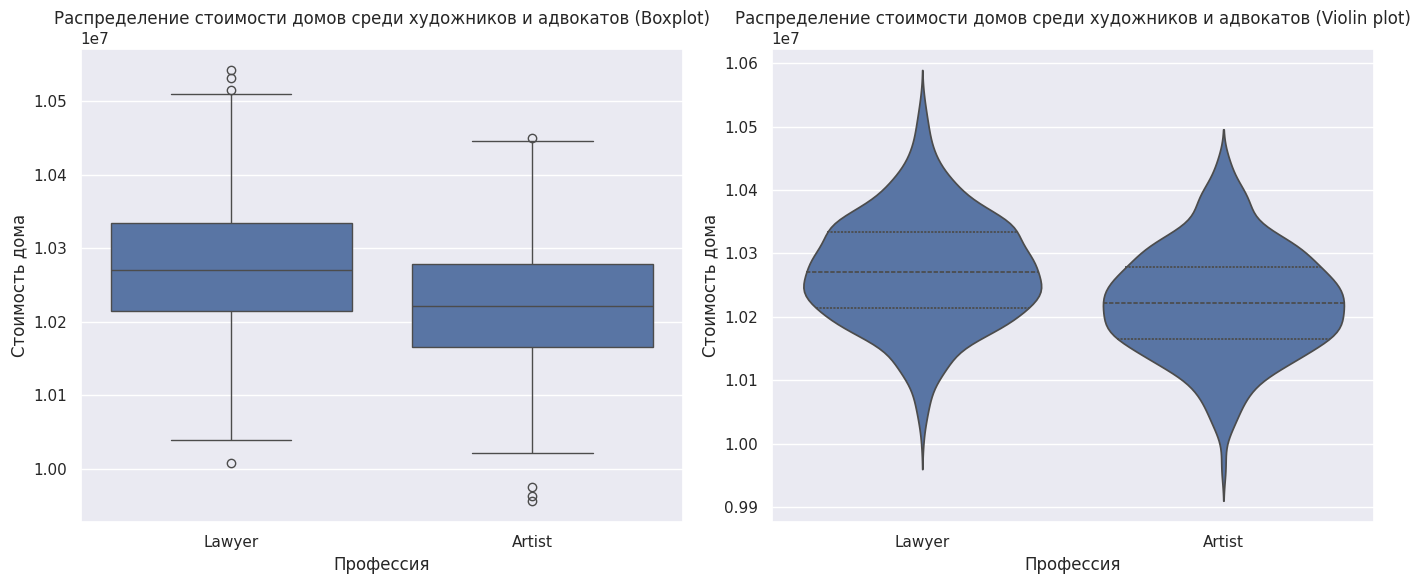

In [23]:

# Фильтруем данные для двух профессий
home_cost_artists = data[data['profession'] == 'Artist']['home_cost']
home_cost_lawyers = data[data['profession'] == 'Lawyer']['home_cost']

# Рассчитываем средние стоимости домов для художников и адвокатов
mean_home_cost_artists = home_cost_artists.mean()
mean_home_cost_lawyers = home_cost_lawyers.mean()

print(f"Средняя стоимость дома у художников: {mean_home_cost_artists}")
print(f"Средняя стоимость дома у адвокатов: {mean_home_cost_lawyers}")

# Проведем t-тест
t_stat, p_value = stats.ttest_ind(home_cost_artists, home_cost_lawyers, equal_var=False)

print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Проверим гипотезу
alpha = 0.05
if p_value < alpha:
    print("Статистически значимое различие обнаружено: дома художников стоят дешевле, чем дома адвокатов.")
else:
    print("Статистически значимых различий в стоимости домов между художниками и адвокатами не обнаружено.")

# Визуализация с использованием boxplot и violin plot
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='profession', y='home_cost', data=data[data['profession'].isin(['Artist', 'Lawyer'])])
plt.title('Распределение стоимости домов среди художников и адвокатов (Boxplot)')
plt.xlabel('Профессия')
plt.ylabel('Стоимость дома')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='profession', y='home_cost', data=data[data['profession'].isin(['Artist', 'Lawyer'])], inner='quartile')
plt.title('Распределение стоимости домов среди художников и адвокатов (Violin plot)')
plt.xlabel('Профессия')
plt.ylabel('Стоимость дома')

plt.tight_layout()
plt.show()


* Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке?


Средняя стоимость недвижимости у тех, кто был в браке: 10175852.353166087
Средняя стоимость недвижимости у тех, кто не был в браке: 10277031.34112589
T-статистика: -18.42316639614951
P-значение: 1.2881846743654852e-73
Статистически значимое различие обнаружено: недвижимость у тех, кто был в браке, немного дешевле, чем у тех, кто не был в браке.


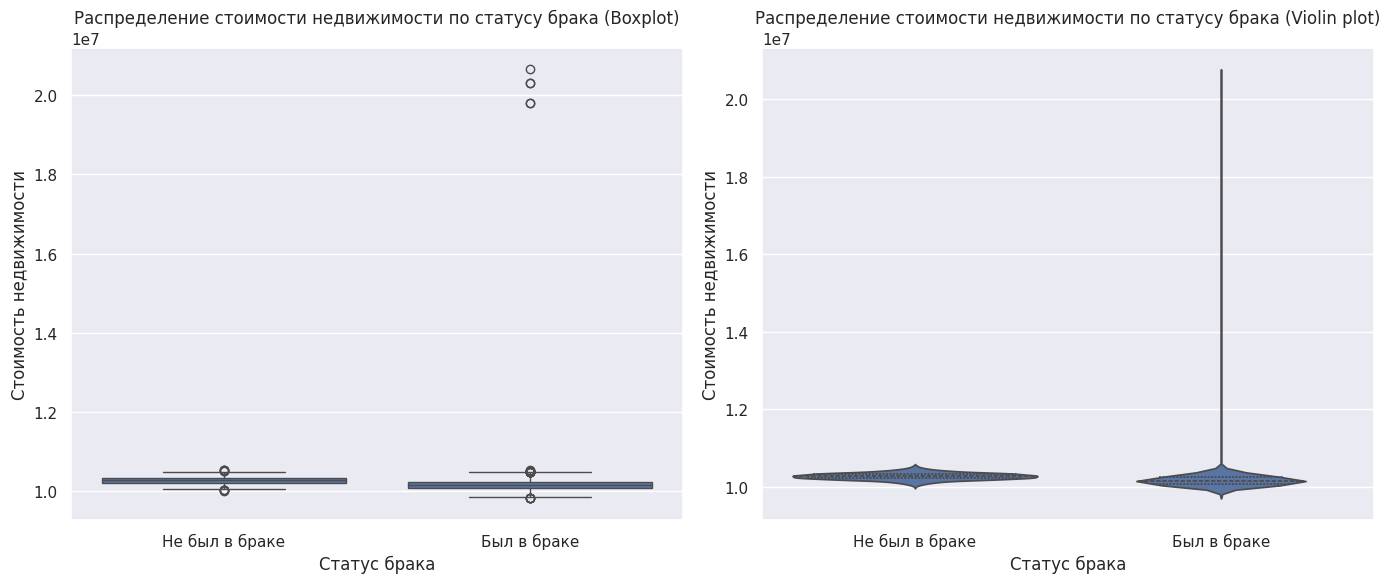

In [26]:

# Фильтруем данные по статусу брака
home_cost_married = data[data['was_married'] == 1]['home_cost']
home_cost_not_married = data[data['was_married'] == 0]['home_cost']

# Рассчитываем средние стоимости недвижимости для обеих групп
mean_home_cost_married = home_cost_married.mean()
mean_home_cost_not_married = home_cost_not_married.mean()

print(f"Средняя стоимость недвижимости у тех, кто был в браке: {mean_home_cost_married}")
print(f"Средняя стоимость недвижимости у тех, кто не был в браке: {mean_home_cost_not_married}")

# Проведем t-тест
t_stat, p_value = stats.ttest_ind(home_cost_married, home_cost_not_married, equal_var=False)

print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Проверим гипотезу
alpha = 0.05
if p_value < alpha:
    print("Статистически значимое различие обнаружено: недвижимость у тех, кто был в браке, немного дешевле, чем у тех, кто не был в браке.")
else:
    print("Статистически значимых различий в стоимости недвижимости между этими группами не обнаружено.")

# Визуализация с использованием boxplot и violin plot
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='was_married', y='home_cost', data=data)
plt.xticks([0, 1], ['Не был в браке', 'Был в браке'])
plt.title('Распределение стоимости недвижимости по статусу брака (Boxplot)')
plt.xlabel('Статус брака')
plt.ylabel('Стоимость недвижимости')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='was_married', y='home_cost', data=data, inner='quartile')
plt.xticks([0, 1], ['Не был в браке', 'Был в браке'])
plt.title('Распределение стоимости недвижимости по статусу брака (Violin plot)')
plt.xlabel('Статус брака')
plt.ylabel('Стоимость недвижимости')

plt.tight_layout()
plt.show()


* Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - Составьте матрицу смежности и воспользуйтесь критерием хи-квадрат из библиотеки scipy

In [29]:


# Создаем матрицу смежности
contingency_table = pd.crosstab(data['sex'], data['was_married'],
                               rownames=['Пол'], colnames=['Статус брака'])
print("Матрица смежности:")
print(contingency_table)

# Проведем тест хи-квадрат
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Хи-квадрат статистика: {chi2_stat}")
print(f"P-значение: {p_value}")

# Проверим гипотезу
alpha = 0.05
if p_value < alpha:
    print("Статистически значимое различие обнаружено: мужчины и женщины различаются по частоте нахождения в браке.")
else:
    print("Статистически значимых различий в частоте нахождения в браке между мужчинами и женщинами не обнаружено.")


Матрица смежности:
Статус брака    0     1
Пол                    
0             670  1359
1             278  3693
Хи-квадрат статистика: 681.4702272530154
P-значение: 3.2003834078153325e-150
Статистически значимое различие обнаружено: мужчины и женщины различаются по частоте нахождения в браке.


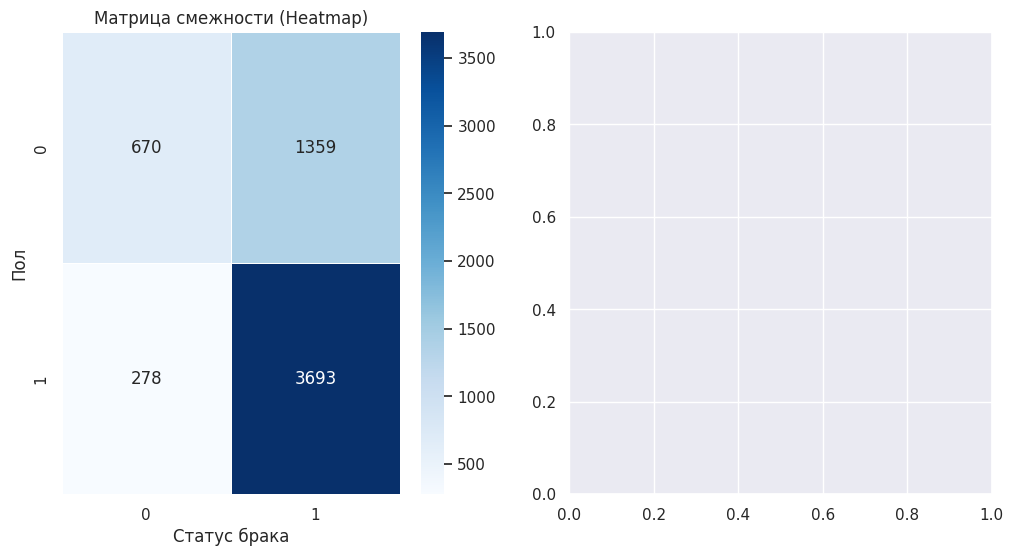

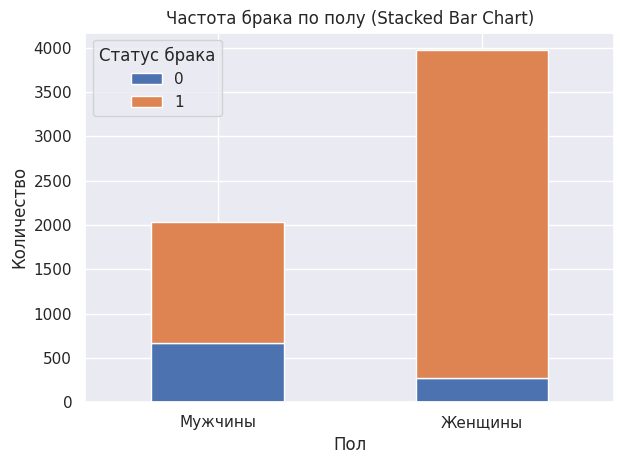

In [28]:

# Создаем матрицу смежности
contingency_table = pd.crosstab(data['sex'], data['was_married'],
                               rownames=['Пол'], colnames=['Статус брака'])

# Визуализация матрицы смежности с использованием heatmap
plt.figure(figsize=(12, 6))

# Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Матрица смежности (Heatmap)')
plt.xlabel('Статус брака')
plt.ylabel('Пол')

# Столбчатая диаграмма
plt.subplot(1, 2, 2)
contingency_table.plot(kind='bar', stacked=True)
plt.title('Частота брака по полу (Stacked Bar Chart)')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.xticks(ticks=[0, 1], labels=['Мужчины', 'Женщины'], rotation=0)

plt.tight_layout()
plt.show()



Правда ли, что женщины с зарплатой выше медианной в среднем более счастливые, чем мужчины с зарплатой, которая выше средней?

Медианная зарплата: 43015999.67668132
Средняя зарплата: 84634445.96954237
Средний уровень счастья у женщин с зарплатой выше медианной: 0.33953478386539976
Средний уровень счастья у мужчин с зарплатой выше средней: 0.5559373105766131
T-статистика: -40.12018759659843
P-значение: 1.627707438976648e-235
Статистически значимое различие обнаружено: мужчины с зарплатой выше медианной в среднем более счастливы, чем женщины с зарплатой выше средней.


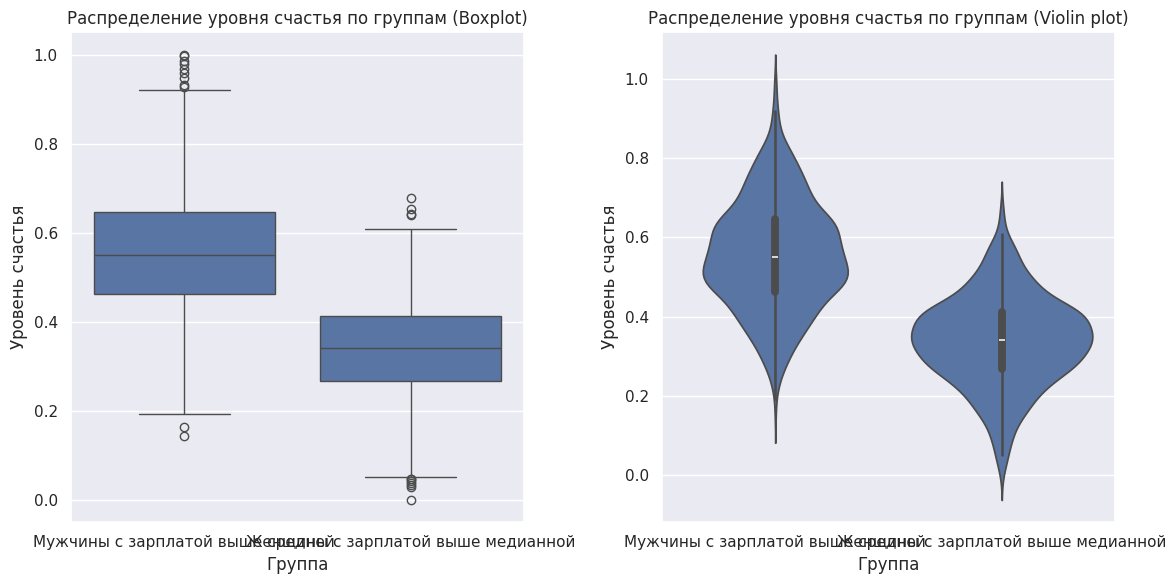

In [34]:
# Определяем медианную и среднюю зарплату
median_salary = data['salary'].median()
mean_salary = data['salary'].mean()

print(f"Медианная зарплата: {median_salary}")
print(f"Средняя зарплата: {mean_salary}")

# Разделяем данные на две группы
happy_women_high_salary = data[(data['sex'] == 0) & (data['salary'] > median_salary)]['happyness']
happy_men_high_salary = data[(data['sex'] == 1) & (data['salary'] > mean_salary)]['happyness']

# Рассчитываем средние значения счастья для обеих групп
mean_happyness_women = happy_women_high_salary.mean()
mean_happyness_men = happy_men_high_salary.mean()

print(f"Средний уровень счастья у женщин с зарплатой выше медианной: {mean_happyness_women}")
print(f"Средний уровень счастья у мужчин с зарплатой выше средней: {mean_happyness_men}")

# Проведем t-тест
t_stat, p_value = stats.ttest_ind(happy_women_high_salary, happy_men_high_salary, equal_var=False)

print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Проверим гипотезу
alpha = 0.05
if p_value < alpha:
    print("Статистически значимое различие обнаружено: мужчины с зарплатой выше медианной в среднем более счастливы, чем женщины с зарплатой выше средней.")
else:
    print("Статистически значимых различий в уровне счастья между этими группами не обнаружено.")


# Визуализация
plt.figure(figsize=(12, 6))

# Boxplot для женщин и мужчин
plt.subplot(1, 2, 1)
sns.boxplot(x='group', y='happyness', data=filtered_data)
plt.title('Распределение уровня счастья по группам (Boxplot)')
plt.xlabel('Группа')
plt.ylabel('Уровень счастья')

# Violin plot для женщин и мужчин
plt.subplot(1, 2, 2)
sns.violinplot(x='group', y='happyness', data=filtered_data)
plt.title('Распределение уровня счастья по группам (Violin plot)')
plt.xlabel('Группа')
plt.ylabel('Уровень счастья')

plt.tight_layout()
plt.show()
